In [1]:
import numpy as np
from scipy.io import loadmat

In [2]:
path="./dataset/data/12.mat"

from mat73 import loadmat
data=loadmat(path)
data

{'cjdata': {'PID': '101016',
  'image': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 1, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=int16),
  'label': array(1.),
  'tumorBorder': array([240.83623693, 248.8641115 , 231.91637631, 258.67595819,
         230.13240418, 272.94773519, 230.13240418, 286.32752613,
         234.59233449, 306.84320557, 242.62020906, 324.68292683,
         254.21602787, 334.49477352, 268.48780488, 341.63066202,
         286.32752613, 343.41463415, 298.81533101, 340.73867596,
         308.6271777 , 330.03484321, 319.33101045, 315.7630662 ,
         325.57491289, 294.3554007 , 319.33101045, 276.51567944,
         311.30313589, 261.35191638, 300.59930314, 249.75609756,
         286.32752613, 240.83623693, 267.59581882, 239.94425087,
         252.43205575, 241.728223  ]),
  'tumorMask': array([[False, False, False, ..., False, False, False

In [3]:
from PIL import Image

In [4]:
img=data['cjdata']
type(img)

dict

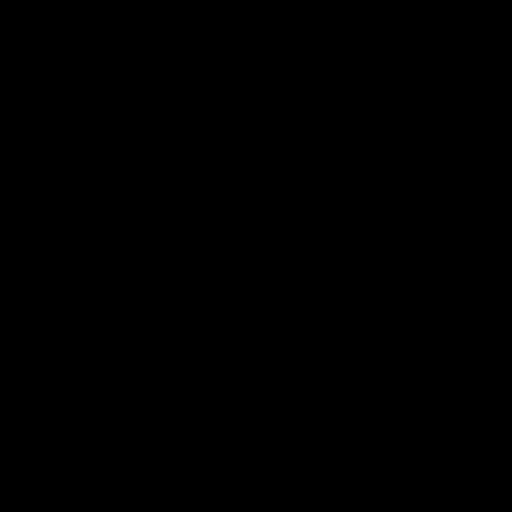

In [5]:
Image.fromarray(img['image'].astype("uint16"))
Image.fromarray(img['tumorBorder'].astype("uint16"))
Image.fromarray(img['tumorMask'].astype("uint16"))

In [6]:
np.shape(img)

()

In [7]:
from PIL import Image
import matplotlib.pyplot as plt

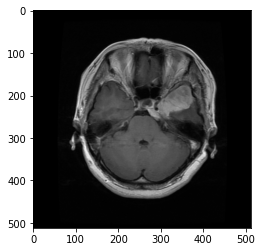

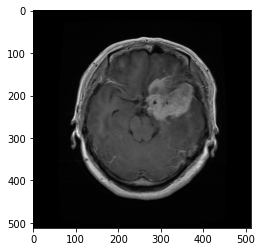

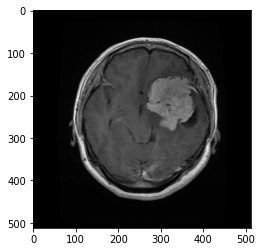

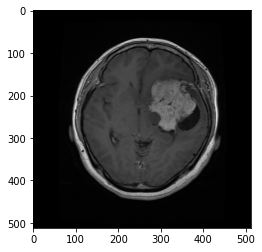

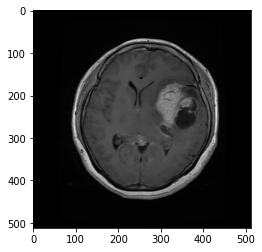

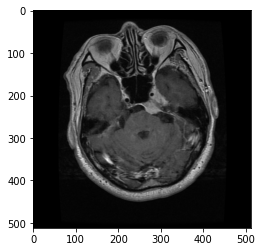

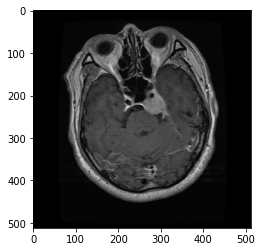

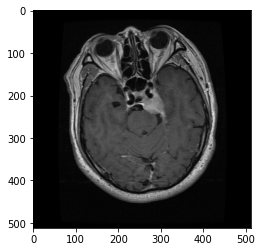

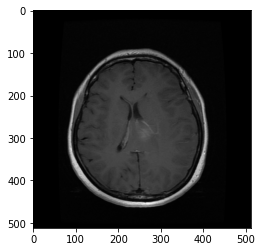

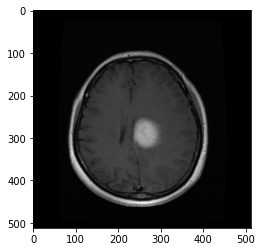

<Figure size 432x288 with 0 Axes>

In [8]:
plt.gray()
for i in range(1,11):
    path=f"./dataset/data/{i}.mat"
    data=loadmat(path)
    img=data['cjdata']
    plt.imshow(img['image'])
    plt.figure()

    

In [9]:
x = np.zeros((300,512,512), dtype=np.float32)
y = np.zeros((300), dtype=np.float32)
for i in range(1,100):
    path=f"./dataset/data/{i}.mat"
    data=loadmat(path)
    img=data['cjdata']
    mat=img['image']
    y[i-1]=img['label']
    x[i-1] = mat
for i in range(1500,1600):
    path=f"./dataset/data/{i}.mat"
    data=loadmat(path)
    img=data['cjdata']
    mat=img['image']
    y[(i-1)%1399]=img['label']
    x[(i-1)%1399] = mat

for i in range(2500,2600):
  
    path=f"./dataset/data/{i}.mat"
    data=loadmat(path)
    img=data['cjdata']
    mat=img['image']
    y[(i-1)%2299]=img['label']
    x[(i-1)%2299] = mat  
len(x)

300

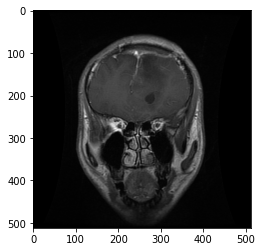

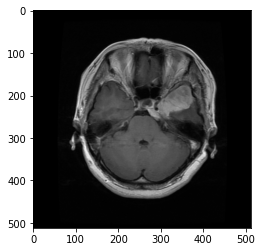

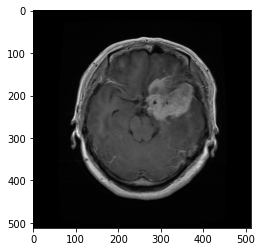

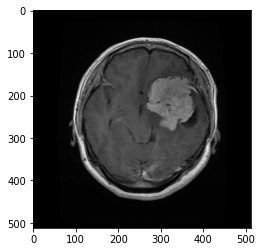

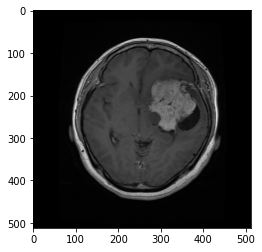

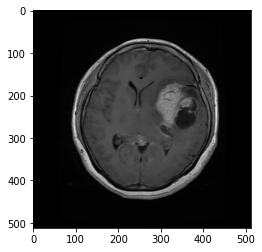

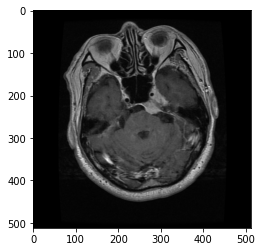

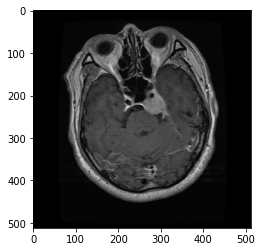

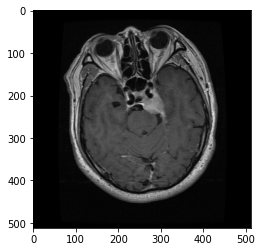

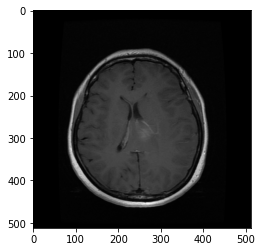

<Figure size 432x288 with 0 Axes>

In [10]:
for i in range(0,10):
    
    plt.imshow(x[i-1])
    plt.figure()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=322)

In [13]:
len(x_train)

210

In [14]:
len(x_test)

90

In [15]:
x_train[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 2., ..., 4., 4., 3.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
x_train=x_train.reshape((-1,262144))   #one vector only 28*28 all pixels stored in one row
x_test=x_test.reshape((-1,262144))
#-1 means left shape will be there like total elements are 40 if (-1,8) the in place of -1 will be 5 automaticaally or there are 5 rows

In [17]:
x_train[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [18]:
x_train.shape

(210, 262144)

In [19]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.utils import to_categorical

In [20]:
x_train[0].shape

(262144,)

In [21]:


# batch_size = 16
# nb_classes =4
# nb_epochs = 5
# img_rows, img_columns = 200, 200
# img_channel = 3
# nb_filters = 32
# nb_pool = 2
# nb_conv = 3

In [26]:

IMG_SIZE=512
# LR = 1e-3
model=Sequential([
 layers.Rescaling(1./255),
    layers.Conv2D(16,4,padding="same",activation="relu",input_shape=(-1,262144)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,4,padding="same",activation="relu",input_shape=(-1,262144)),
    layers.MaxPooling2D(),
    layers.Conv2D(64,4,padding="same",activation="relu",input_shape=(-1,262144)),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(3)
])
 

In [30]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
history=model.fit(
    x_train,
    validation_data=x_test,
    epochs=5
)

ValueError: Input 0 of layer "conv2d_7" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (Dimension(None), Dimension(262144))

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0 )
print("Test Score: ", score[0])
print("Test accuracy: ", score[1])

In [ ]:
model=Sequential()

In [ ]:
from tensorflow.keras.layers import Conv2D
model.add(Conv2D(32,(3,3),input_shape=(512,512,3),activation='relu'))  #input layer 
#add convolution layer as a input layer with relu activation function
#for output layer use always sigmoid or softmax
#input_shape is size of image
#(3,3)  is filter
#32 is no. of neurons

In [ ]:
from tensorflow.keras.layers import MaxPooling2D
model.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
#hidden layers

model.add(Conv2D(32,(3,3),activation='relu'))  #2nd layer  #input shape automically from previous layer
model.add(MaxPooling2D(pool_size=(2,2)))


               

In [ ]:
from tensorflow.keras.layers import Flatten
model.add(Flatten())

In [ ]:
from tensorflow.keras.layers import Dense
model.add(Dense(units=128,activation='relu'))
#units = no. of nodes

In [ ]:
model.add(Dense(units=3,activation='softmax'))  #output layer

#sigmoid beacause there are 2 categories only else softmax

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                           shear_range=0.2,
                           zoom_range=0.2,
                           horizontal_flip=True)
#rotating data so that we have more data 

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
model.fit_generator(x_train[0],
                        steps_per_epoch=400,
                        epochs=3,
                        validation_data=x_test[0],
                        validation_steps=200)

In [41]:

# class BrainTumorDataset():
#     """ Brain Tumor dataset."""

#     def __init__(self, root_dir, transform=None):
#         """
#         Args:
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#         """
#         self.root_dir = root_dir
#         self.transform = transform

#     def __len__(self):
#         return 3064

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()
#         path = "../input/figshare-brain-tumor-dataset/dataset/data/"
#         f = h5py.File(path + fileslist[idx],'r')
#         # list(f.keys())
        
#         data = f.get('cjdata/tumorMask/')
#         label = f.get('cjdata/label/')
#         data = np.array(data)
#         sample = {'image': data, 'landmarks': label}

#         if self.transform:
#             sample = self.transform(sample)
        

#         return sample

In [ ]:
dir="./dataset/data/"
dataset=BrainTumorDataset(path)